# Исследование объявлений о продаже квартир

Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Цель:**
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
#импортируем библиотеки
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
#Открываем датасет
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#Первые 5 строк дф
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#Информация о дф
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**в дф:**  
**21 колонка** , есть столбцы написаные не в формате snack case  
**23699 строк**, есть строки с отсутвующими данными

In [5]:
#Анализ основных статистических показателей в разрезе столбцов
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
#Доля пропущенных значений в разрезе параметров
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Самое большое количество пропусков в столбце *is_apartment* - 88%, в столбцах *ponds_nearest, parks_nearest* - больше половины данных отсутствует. Самое маленькое количество пропусков *kitchen_area* - всего 9%

Построим общие гистограммы по данным из data

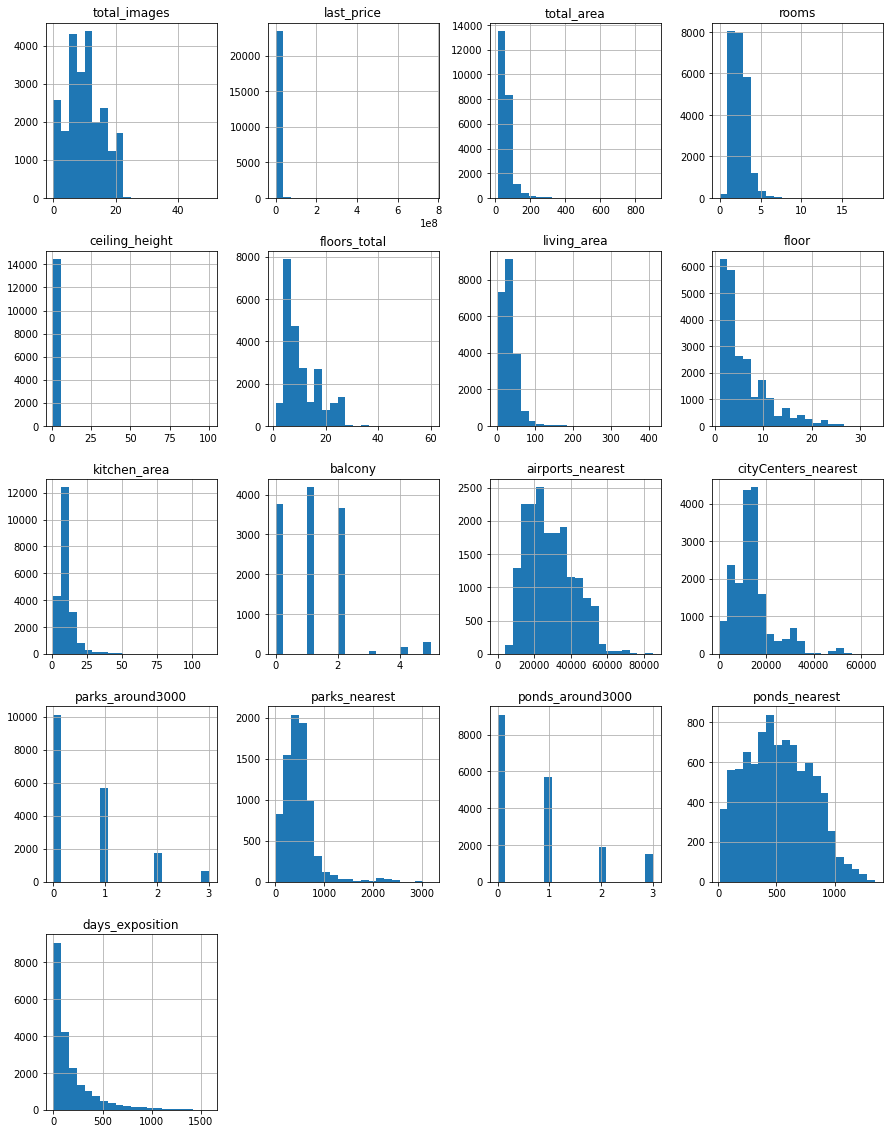

In [7]:
data.hist(bins=20, figsize=(15, 20));

### Предобработка данных

In [8]:
#столбцы с пропущенными значениями
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

ceiling_height (**высота потолков) - будем заполнять медианными значениями в разрезе количества комнат**           
floors_total (**всего этажей в доме) - пустые значения составляют низкий процент, на результаты не окажут сильного влияния, для заполения пустот используем медианое значения** 
living_area (**жилая площадь в квадратных метрах (м²)) - пустные значения будем заполнять медианными данными в разрезе количества комнат**   
is_apartment (**апартаменты (булев тип)) - в текущем задании данный столбец не оказывает сильного влияние, и скорее всего там где пустые знаяения это не апартаменты, поставим False** 
kitchen_area(**площадь кухни в квадратных метрах (м²)) - пустные значения будем заполнять медианными данными в разрезе количества комнат**     
balcony **(число балконов) - Скорее всего нет балконов, меняем на - 0**     
locality_name **(название населённого пункта) - пустные значения составляют низкий процент существенного влияние на результат не повлияют, удалим строки с пустыми значениями, т.к. данные не возможно установить**     airports_nearest **(расстояние до аэропорта (м))- будем расчитывать по медианным значениям в разрезе населенных пунктов, там где в растояние не указанно заменим на медианное значение выборки**
cityCenters_nearest **(расстояние до центра города (м))- будем расчитывать по медианным значениям в разрезе населенных пунктов, там где в растояние не указанно заменим на медианное значение выборки**                       
parks_around3000 **(число парков в радиусе 3 км) - Скорее всего нет парков врадиусе 3 км, меняем на - 0**         
parks_nearest **(расстояние до ближайшего парка (м))- будем расчитывать по медианным значениям в разрезе населенных пунктов, там где в растояние не указанно заменим на медианное значение выборки**   
ponds_around3000 **(число водоёмов в радиусе 3 км) - Скорее всего нет водоемов в радиусе 3 км., меняем на - 0**  
ponds_nearest **( расстояние до ближайшего водоёма (м)) - будем расчитывать по медианным значениям в разрезе населенных пунктов, там где в растояние не указанно заменим на медианное значение выборки**  
days_exposition **(сколько дней было размещено объявление (от публикации до снятия)) - возможности добыть актуальную информацию по размещению объявления нет, заменим на медианные выборки.**

In [9]:
#Переименуем столбцы
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [10]:
#Удаление строк без назваия населенного пункта
data.dropna(subset=['locality_name'], inplace=True)
print(f"Пустых строк в столбце locality_name: {len(data.loc[data['locality_name'].isna()])}")

Пустых строк в столбце locality_name: 0


In [11]:
#функция изменени пропусков
def change_na(column, value):
    try:
        data[column].fillna(value=value, inplace=True)
    except:
        print('Ошибка в функции change_na!')
        
#Заполнение пропусков 0-ми в balcony, parks_around3000, ponds_around3000
change_na('balcony', 0)
change_na('parks_around3000', 0)
change_na('ponds_around3000', 0)
#заполнения пропусков в столбце floors_total
change_na('floors_total', data['floors_total'].median())
#Заполним пропуски на False
change_na('is_apartment', 'False')

In [12]:
#Проверяем и исправляем значения где этаж по медиане оказался выше этажности дома
data['floors_total'] = data['floor'].where(data['floor'] > data['floors_total'], data['floors_total'])
print(f"Количество объeктов где меиданное значение больше количества этажей в доме: \
{len(data.query('floors_total < floor'))}")

Количество объeктов где меиданное значение больше количества этажей в доме: 0


In [13]:
#Проверяем количество комнат 
print(f"Список уникальных значений количества комнат{data['rooms'].unique()}")

Список уникальных значений количества комнат[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


В значениях столбца rooms, есть 0 комнат, что не соотвествует действительности (не бывает 0 комнат), расчитаем количество комнат, исходя из площади квартиры

In [14]:
#функция определящия количество комнат по площади
def area_room(area):
    if 15.5 <= area <= 45.0:
        return 1
    elif 45.01 <= area <= 70.0:        
        return 2
    elif 70.01 <= area <= 100.0:        
        return 3    
    elif 100.01 <= area <= 140.0:        
        return 4 
    elif 140.01 <= area <= 180.0:        
        return 5
    elif 180.01 <= area <= 210.0:        
        return 6
    elif 210.01 <= area <= 250.0:        
        return 7
    elif 250.01 <= area <= 290.0:        
        return 8
    elif 290.01 <= area <= 330.0:       
        return 9
    elif 330.01 <= area <= 340.0:        
        return 10
    elif 340.01 <= area <= 371.0:    
        return 11
    else:
        return 100
#заменяем 0 на значение в соотвествии с площадью    
data.loc[data['rooms'] == 0, 'rooms'] = data['total_area'].apply(area_room).astype(int)
print(f"Список уникальных значений количества комнат{data['rooms'].unique()}")

Список уникальных значений количества комнат[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16 12]


In [15]:
#функция изменения пропусков на медлианное значение
def change_na_median(column, group_column):
    data[column] =  data[column].fillna(data.groupby(group_column)[column].transform('median'))

change_na_median('living_area', 'rooms')
change_na_median('kitchen_area', 'rooms')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [16]:
#Поиск явных дубликатов
data.duplicated().sum()

0

Явных дубликатов строк нет, ищем возможные варианты разного написания однихз и тех же названий населенных пунктов

In [17]:
#Уникальные значения столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:

locality_name_unique = list(data['locality_name'].unique())
def find_duplicates(list):
    dup = []
    #Цикл для выявления названий населенных пунктов
    for v in list:
        if len(v.split()) > 1:
            a = ""
            for i in v.split():    
                if i[0].isupper():
                    a += f'{i} '           
            if len(a) > 0:
                dup.append(a.strip())                
        else:
            dup.append(v)
    #Сотавление уникальных значений дубликатов населенных пунктов
    dup = pd.Series(dup) 
    dup = dup[dup.duplicated(keep='first')]  
    dup.drop_duplicates(keep='first', inplace=True)
    return dup

duplicate_list = find_duplicates(locality_name_unique)
print(f'Количество повторяющихся населенных пунктов {len(duplicate_list)}')

Количество повторяющихся населенных пунктов 55


In [19]:
#Создаем словарь, где на против уникально значения дуликата будет одинаковое наименования населенного пункта
duplicate_dict = {}
for short_name in duplicate_list:
    for full_name in locality_name_unique:
        if short_name in full_name:
            duplicate_dict[short_name] = full_name
            break
print(f'Количество строк в словаре дубликатов {len(duplicate_dict)}')

Количество строк в словаре дубликатов 55


In [20]:
#Функция по замене наименования населенного пункта (испраляет неявные дубликаты)
def remove_locality_name(name):
    for short_name, full_name in duplicate_dict.items():
        if short_name in name:
            return full_name
        
    return name
#Исправления неявных дубликатов в столбце locality_name      
data['locality_name'] = data['locality_name'].apply(remove_locality_name)
print(f"Количество повторяющихся населенных пунктов {len(find_duplicates(data['locality_name'].unique()))}")

Количество повторяющихся населенных пунктов 0


Исправление не корректных данных в столбце **ceiling_height**  
Норма высота потолков в Санкт-Петербурге варьируется *от 2,1 до 3 метров (2,1 - норма, обеспечивающее безопасность передвижения людей)*. В дореволюционных жилых домах *(1890–1930 гг.), в "сталинках" (1930–1950 гг.)* высота потолков была значительно *выше 3,2–5*. В элитном жилье втречается высота от *5 до 10 метров* Норму высоту потолков возьмем в промежутке **2,1 - 10 метров**

In [21]:
#Уникальные значения ceiling_height
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [22]:
#Строки где высота потолков менее 2,1 метра
data.query('ceiling_height > 10').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5,32.0,2,False,False,False,8.80,2.0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3,53.0,2,False,False,False,8.00,0.0,Волхов,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9,30.0,2,False,False,False,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,1,27.0,25,17.0,17,False,False,True,9.01,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5,19.5,1,True,False,False,5.50,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


In [23]:
#Изменяем высоту потолков более 10 метров
data['ceiling_height'].mask((data['ceiling_height'] > 10.0) & (data['ceiling_height'] < 11.0), 10, inplace=True)
data['ceiling_height'].mask((data['ceiling_height'] > 10.0), data['ceiling_height'] / 10, inplace=True)
print(f"Объекты с высотой потолков более 10 метров: {len(data.query('ceiling_height > 10'))}")

Объекты с высотой потолков более 10 метров: 0


Необходимо исправить значения менее *2,1 метра* до стандартного **2,1 метра**, т.к. скорее всего это ошибка при заполнении данных

In [24]:
#Строки где высота потолков менее 2,1 метра
data.query('ceiling_height < 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15,17.5,6,False,False,False,6.50,0.0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5,40.0,4,False,False,False,6.00,1.0,Луга,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18,16.6,9,False,False,False,8.80,2.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2,27.5,1,False,False,False,5.20,0.0,городской посёлок Мга,NaN,NaN,0.0,NaN,0.0,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5,17.6,5,False,False,False,9.01,0.0,Луга,NaN,NaN,0.0,NaN,0.0,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17,15.2,12,False,False,False,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
15061,19,5600000.0,56.40,2018-05-11T00:00:00,2,1.40,14,32.4,5,False,False,False,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5,63.9,2,False,False,False,12.00,0.0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5,20.0,5,False,False,False,6.00,0.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37,17.4,5,False,False,False,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


In [25]:
#Изменение высоты потолков менее 2,1 метра
data['ceiling_height'].mask((data['ceiling_height'] < 2.1), 2.1, inplace=True)
print(f"Объекты с высотой потолков менее 2,1 метра: {len(data.query('ceiling_height < 2.1'))}")

Объекты с высотой потолков менее 2,1 метра: 0


In [26]:
#Изменение данных колонках расчеты которых зависят от столбца населенные пункты или комнаты
change_na_median('airports_nearest', 'locality_name')
change_na_median('city_centers_nearest', 'locality_name')
change_na_median('parks_nearest', 'locality_name')
change_na_median('ponds_nearest', 'locality_name')
change_na_median('ceiling_height', 'rooms')
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             1
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4829
city_centers_nearest    4829
parks_around3000           0
parks_nearest           5998
ponds_around3000           0
ponds_nearest           4938
days_exposition         3180
dtype: int64

**parks_nearest, airports_nearest, city_centers_nearest, ponds_nearest** остались пустые знаяения в населенных пунктах в которых отсутвуют значения до указанных обектов. Расчет будем производить по медианным значениям всей выборки  
**ceiling_height** - 1 пустое значение, данны строка будет удалена             
**days_exposition** - в этом столбце отсутвующие значения означают, что объект еще не продали

In [27]:
change_na('airports_nearest', data['airports_nearest'].median())
change_na('city_centers_nearest', data['city_centers_nearest'].median())
change_na('parks_nearest', data['parks_nearest'].median())
change_na('ponds_nearest', data['ponds_nearest'].median())
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             1
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

**В таблицы заполнены все пропуски**  

Основные причины по которым они возникли, в пользовательских данных это скорее всего ошибки внесения данных:  
- Пользователи не вносили данные потому что параметр отсутвовал
- Пользователи не вносили данные потому что не значли, что вносить
- Пользователь вносил даннные которые обрабатывались с ошибкой и переводились в nan

в картографических данных пропуски возникали:  
- Возможно по причине отсутвия параметра
- Возможно по причине не сбоя в расчетах растоянии до параметра


**Изменение типов данных**  
Необходимо изменить тип данных is_apartment и days_exposition дату и first_day_exposition.    
*is_apartment* хранятся булевые значения, логично перевести в этот формат bool  
*first_day_exposition* хранятится дата и время, надо перевести в понятный тип данных для этох данных **datetime**  
*days_exposition* хранится количество дней, можно перевести в целые числа, но там храниться NAN, поэтому оставим пока ка есть.   
Перевести *floors_totalб balcony в int*, т.к. количество этажей и балконов только целые числа

In [76]:
#Инменение типа is_apartment на bool
data['is_apartment'] = data['is_apartment'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# data['days_exposition'] = data['days_exposition'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23294 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23294 non-null  int64         
 1   last_price               23294 non-null  float64       
 2   total_area               23294 non-null  float64       
 3   first_day_exposition     23294 non-null  datetime64[ns]
 4   rooms                    23294 non-null  int64         
 5   ceiling_height           23294 non-null  float64       
 6   floors_total             23294 non-null  int64         
 7   living_area              23294 non-null  float64       
 8   floor                    23294 non-null  int64         
 9   is_apartment             23294 non-null  bool          
 10  studio                   23294 non-null  bool          
 11  open_plan                23294 non-null  bool          
 12  kitchen_area             23294 n

In [29]:
data.dtypes 

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Перед удалением редких и выбивающихся значений сохраним старый датасет в переменну data_old

In [30]:
data_old = data

In [31]:
data.query('total_area <= 8.0 or living_area <= 8.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.65,17,3.0,17,True,False,False,11.00,0,Санкт-Петербург,19272.0,13073.0,0.0,460.0,0.0,503.0,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,True,False,False,9.00,0,Санкт-Петербург,32453.0,6521.0,0.0,460.0,1.0,1012.0,91.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.0,1,True,False,False,17.00,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,503.0,168.0
17582,11,2680000.0,22.0,2018-08-11,1,2.65,25,5.0,8,True,True,False,9.01,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
19251,19,4050000.0,33.0,2018-10-15,1,2.50,22,6.5,21,True,False,False,18.00,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,503.0,44.0
20994,7,8900000.0,50.6,2018-10-22,2,2.50,7,8.0,3,True,False,False,31.00,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN
21758,0,2330000.0,23.0,2018-01-01,1,2.65,24,2.0,22,True,True,False,9.01,0,посёлок Мурино,51553.0,21888.0,0.0,460.0,0.0,133.0,66.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,True,False,False,9.80,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,503.0,33.0
23208,12,4800000.0,37.0,2016-02-24,1,2.65,14,8.0,11,True,False,False,22.00,0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,True,False,False,16.00,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Минимальная норма жилой площади квартиры на 1 человека по действующим СПиНам всоставляет 8 кв. метров. В *total_area* или *living_area* площадь квартир менее 8 кв.метрову жилой площади имеют 8 квартир, это скорее всего ошибка, коректное исправления которой не представляется возможным.  
**Удалим все строки в *living_area* где данный показатель, менее 8 кв.м.**  
По нормам СПиН минимальный размер кухонь 5 кв.метров, удалим квартиры в которых кухни менее 4 квадратных метров, т.к. в апартаментах, возможен вариант, менее 5 квадратных метров, но сложно представить квартиру с кухней менее  менее 4 кв. метров.  
**Удалим все строки в *kitchen_area* где данный показатель, менее 4 кв.м.**  

In [32]:
#Удаление редких выбивающихся значение из столбца living_area
data = data.query('living_area >= 8.0')
print(f"Объектов с жилой площадью менее 8 метров: {len(data.query('total_area < 8.0 or living_area < 8.0'))}")

Объектов с жилой площадью менее 8 метров: 0


In [33]:
#Удаление редких выбивающихся значение из столбца kitchen_area
data = data.query('kitchen_area >= 4.0')
print(f"Объектов с площадью кухни менее 4 метров: {len(data.query('kitchen_area < 4.0'))}")

Объектов с площадью кухни менее 4 метров: 0


In [34]:
#Удаление редких выбивающихся значение из столбца room
data = data.query('rooms < 8')
print(f"Объектов с количеством комнат более 8: {len(data.query('rooms >= 8'))}")

Объектов с количеством комнат более 8: 0


In [35]:
#Удаление редких выбивающихся значение из столбца total_area
data = data.loc[(data['total_area'] > 15) & (data['total_area'] < 500)]
print(f"Объектов с плошадью более 500 кв.метров и менее 15 кв. метров: \
{len(data.loc[(data['total_area'] < 15) | (data['total_area'] > 500)])}")

Объектов с плошадью более 500 кв.метров и менее 15 кв. метров: 0


In [36]:
#Удаление редких выбивающихся значение из столбца last_price
data = data.loc[(data['last_price'] > 1000000) & (data['last_price'] < 100000000)]
data.loc[(data['last_price'] < 1000000) | (data['last_price'] > 100000000)]
print(f"Объектов с ценой за объект более 100 000 000 и менее 1 000 000: \
{len(data.loc[(data['last_price'] < 1000000) | (data['last_price'] > 100000000)])}")

Объектов с ценой за объект более 100 000 000 и менее 1 000 000: 0


In [37]:
#Проверяем на сколько уменьшился датасет
data.shape[0] / data_old.shape[0]

0.9849471458773784

### Посчитайте и добавьте в таблицу новые столбцы

In [38]:
#добавлено в таблицу: цена одного квадратного метра
data['one_square_meter_price'] = data['last_price'] / data['total_area']
print('Первые 5 значений (цена 1 квадратного метра) столбца one_square_meter_price:')
data['one_square_meter_price'].head()

Первые 5 значений (цена 1 квадратного метра) столбца one_square_meter_price:


0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: one_square_meter_price, dtype: float64

In [39]:
#добавлено в таблицу: день недели публикации
data['day_of_week'] = pd.to_datetime(data['first_day_exposition']).dt.dayofweek
print('Первые 5 значений (день недели) столбца day_of_week:')
data['day_of_week'].head()

Первые 5 значений (день недели) столбца day_of_week:


0    3
1    1
2    3
3    4
4    1
Name: day_of_week, dtype: int64

In [40]:
#добавлено в таблицу: месяц публикации
data['publication_month'] = pd.to_datetime(data['first_day_exposition']).dt.month
print('Первые 5 значений (месяц публикации) столбца publication_month:')
data['publication_month'].head()

Первые 5 значений (месяц публикации) столбца publication_month:


0     3
1    12
2     8
3     7
4     6
Name: publication_month, dtype: int64

In [41]:
#добавлено в таблицу: год публикации
data['publication_year'] = pd.to_datetime(data['first_day_exposition']).dt.year
print('Первые 5 значений (год публикации) столбца publication_year:')
data['publication_year'].head()

Первые 5 значений (год публикации) столбца publication_year:


0    2019
1    2018
2    2015
3    2015
4    2018
Name: publication_year, dtype: int64

**Создадим функцию для групировки квартир по этажам где:**  
- первый этаж (**первый**) = **1**
- последний этаж (**последний**) = **3**
- остальные этажи (**другой**) = **2**


In [42]:
def flat_type(row):
    if row['floor'] == row['floors_total']:
        return 3
    elif row['floor'] == 1:
        return 1
    else:
        return 2
#добавлено в таблицу: тип объекта 3 - последний, 1 - первый, 2 - другой
data['floor_type'] = data[['floor', 'floors_total']].apply(flat_type, axis=1)
print('Уникальные значения столбца floor_type:')
data['floor_type'].unique()

Уникальные значения столбца floor_type:


array([2, 1, 3])

In [43]:
#добавлено в таблицу: растояние объекта от центра в км.
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).apply(round)
print('Первые 5 значений столбца city_centers_nearest_km:')
data['city_centers_nearest_km'].head()

Первые 5 значений столбца city_centers_nearest_km:


0    16
1    19
2    14
3     7
4     8
Name: city_centers_nearest_km, dtype: int64

### Проведите исследовательский анализ данных

Создадим таблицу **data_filter** с необходимыми нам столбцами 

In [44]:
#анализ основных сатитистических показателей по выбранным параметрам
data.filter(items=[
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'last_price', 
    'rooms', 
    'ceiling_height',
    'floor',
    'floor_type',
    'floors_total',
    'city_centers_nearest',
    'airports_nearest',
    'parks_nearest',
    'day_of_week',
    'publication_month'
]).describe()


,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floor_type,floors_total,city_centers_nearest,airports_nearest,parks_nearest,day_of_week,publication_month
count,23294.000000,23294.000000,23294.000000,2.329400e+04,23294.000000,23294.00000,23294.000000,23294.000000,23294.000000,23294.000000,23294.000000,23294.000000,23294.000000,23294.000000
mean,59.825442,34.029748,10.428766,6.273007e+06,2.069288,2.69617,5.928608,2.020821,10.762171,14261.412574,29106.088134,472.085043,2.566283,6.406500
std,32.196656,20.078907,5.440092,6.309356e+06,1.018276,0.24245,4.892351,0.510437,6.584740,7715.285950,11768.225592,204.771648,1.788153,3.492427
min,15.500000,8.000000,4.000000,1.010000e+06,1.000000,2.10000,1.000000,1.000000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,18.500000,7.400000,3.480000e+06,1.000000,2.60000,2.000000,2.000000,5.000000,10934.000000,20994.500000,460.000000,1.000000,3.000000
50%,52.000000,30.400000,9.010000,4.650000e+06,2.000000,2.65000,4.000000,2.000000,9.000000,13270.000000,27223.000000,460.000000,3.000000,6.000000
75%,70.000000,42.700000,11.500000,6.800000e+06,3.000000,2.70000,8.000000,2.000000,16.000000,15793.750000,35937.250000,460.000000,4.000000,10.000000
max,495.000000,347.500000,107.000000,9.900000e+07,7.000000,10.00000,33.000000,3.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


**Рассмотрим основные статистические данные по выбранным параметрам квартир**  
*total_area и living_area* - очень большой разброс общей и жилой площади квартиры с предельно низкими минимальными значениями и высоких максимальных значениях Медианные значения меньше среднестатистических значений, а так же довольно высокие стандартные отклонение, говорит о большом разбросе площади, но с большой долей концентрации квартир площадью в районе медианных значений. Необходимо визуализировать данные.  
*kitchen_area* - при большой разницы минимального и максимального значения имеет довольно низкое стандартное отклонение, что говорит о более равномерном распределении данных в выборке. Что объясняется тем, что размер кухни имеет станадртные размеры в определеннных размерах, с маленьким кличеством выбросов.  
*last_price* - Наблюдается большой разброс цен, с большим стандартным отклонением. Что харакетрно дл данного параметра, т.к. влияение на цены оказывают много факторов, серьезно уменьшающие или увеличивающие цену, в том числе резко отличаюся друг от друга.     
*rooms, ceiling_height, floor, floors_total* - предсказуемо имеют небольшой разброс, и неболшое стандартное отклонение. Это объясняется спецификой данных параметров, ограничивающие показатель в определеннх рамках (количество этажей ограниченно количеством этажей, возможностями застройки и концентрации количества этажей в определенном диапазоне, так же как и высота потолков ограничена стандартизированой высотой, тем более количество комнат, ограниченно площалью квартиры и разработаным планом постройки.).    
*city_centers_nearest, airports_nearest, parks_nearest* - данные параметры квартир отличаются большим разбросом и большим стандартным отклонением. Это связанно с удаленностью от статических объектов, ограниченных в определенных населенных пунктах.   
*day_of_week* - предсказуемо имеет не большой разброс, ограниченный нями недели, и небольшим стандартным отклонениемю  
*publication_month* - месяц публикации имеет небольшой разброс цен, ограниченный количество месяцев в году, надо обратить внимание на довольно высокое стандартное отклонение.

**Для более точного анализа неободимо рассмотреть визуализацию рассмотренных параметров.**

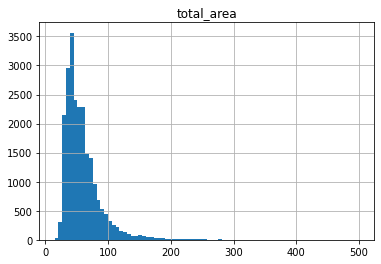

In [45]:
#Гистограмма на весь размах выборки
data['total_area'].hist(bins=80, range=(15, 500));
plt.title(label='total_area')
plt.show()

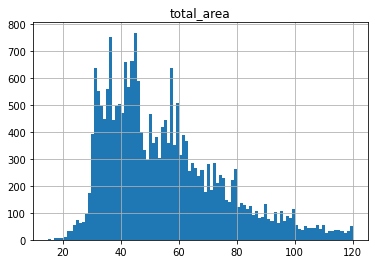

In [46]:
#Гистограмма на основную концентрацию квартир в выборки
data['total_area'].hist(bins=100, range=(15, 120));
plt.title(label='total_area')
plt.show()

**total_area** - основое количество квартир *концентрируется в диапазоне 30-60 метров*, что характерно тем, что большинство квартир 1-2 и меньше 3-х комнатные, имеющие определенные размеры по площади 35-70 кв.метров и 60 - 80 соотвественно. Диаграмма не иммет форму нормального распределение, с большим смещением в сторону минимальных значение в размахе выборки и имеет длинный "хвост" в сторону максимальных значений. 

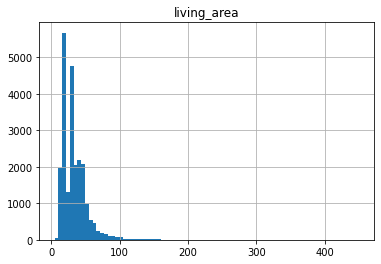

In [47]:
#Гистограмма на весь размах выборки
data['living_area'].hist(bins=80, range=(5, 450));
plt.title(label='living_area')
plt.show()

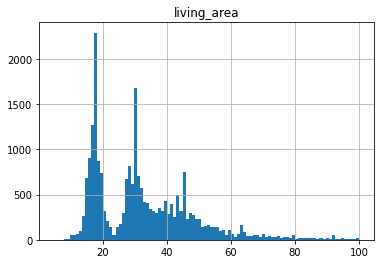

In [48]:
#Гистограмма на основную концентрацию квартир в выборки
data['living_area'].hist(bins=100, range=(5, 100));
plt.title(label='living_area')
plt.show()

**living_area** - основое количество квартир по размеру жилой площади концентрируется в диапазоне от 15 до 20 метров, за тем от 27-32 кв. метров, так же имеется увеличенное количество квартир с жилой площадью в районе 45 кв. метров. Видимо в выборке более широко представленны 1 комнатные кыартиры, либо имеются факты занижения жилой площади квартир. более подробно узнаем после гистограммы по количеству комнат. 

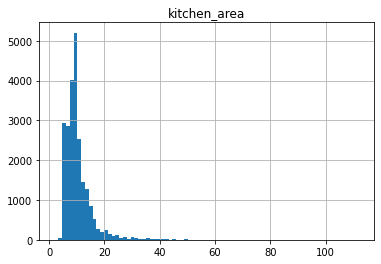

In [49]:
#Гистограмма на весь размах выборки
data['kitchen_area'].hist(bins=80, range=(2, 112));
plt.title(label='kitchen_area')
plt.show()

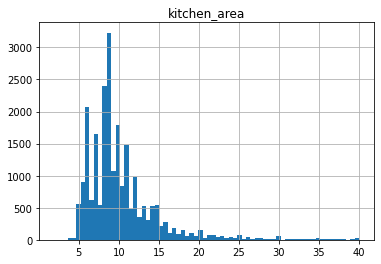

In [50]:
#Гистограмма на основную концентрацию квартир в выборки
data['kitchen_area'].hist(bins=70, range=(2, 40));
plt.title(label='kitchen_area')
plt.show()

**kitchen_area** - основное распределение значений выборки сосредоточен в районе 5.5 - 12 метров, что так же характеризует вышуопомянутый комментарий о преобладающем боьшинстве 1 комнатных квартир или аппартаментов. 

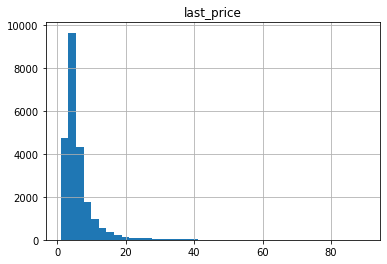

In [51]:
#Гистограмма на весь размах выборки
data['last_price'].apply(lambda x: x / 1000000).hist(bins=40, range=(1, 90));
plt.title(label='last_price')
plt.show()

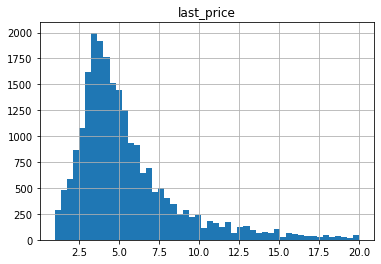

In [52]:
#Гистограмма на основную концентрацию квартир в выборки
data['last_price'].apply(lambda x: x / 1000000).hist(bins=50, range=(1, 20));
plt.title(label='last_price')
plt.show()

**last_price** - в основном квартиры стоят в диапазоне 2 млн.р - 6 млн.р. длинный хвост с очень маленьким количество квартир в сторону увеличения, говорит о том, что в выборке представленны в основном квартиры в определнному ценовом диапазоне. Медианное значение больше приближенно к минимальным ценам, а большой разброс характеризуется большим количеством ограниченого числа квартир относительно общего количества квартир в выборке по более высоким ценнам.  

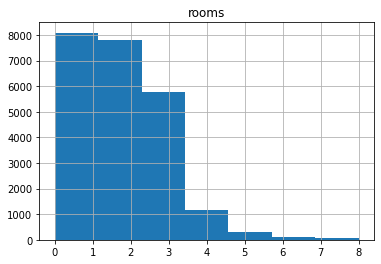

In [53]:
#Гистограмма на весь размах выборки
data['rooms'].hist(bins=data['rooms'].max(), range=(0, 8));
plt.title(label='rooms')
plt.show()

**rooms** - распределение квартир на гистограмме подтверждает самое большое количество 1 и 2 комнатных квартир. Чем больше комнат тем меньше количество квартир. Что частично подтверждает корректность вышеперечисленных данных и и говорит о том, что определяющее значение на параметры указывающие пользователем определяют именно 1 и 2 комнатные квартиры.  

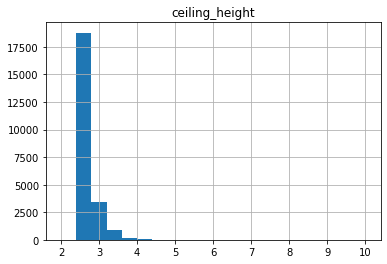

In [54]:
#Гистограмма на весь размах выборки
data['ceiling_height'].hist(bins=20, range=(2, 10));
plt.title(label='ceiling_height')
plt.show()

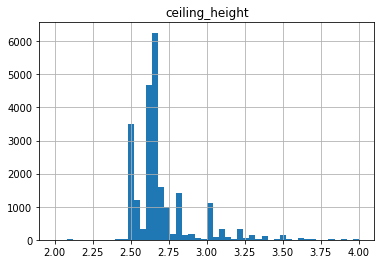

In [55]:
#Гистограмма на основную концентрацию квартир в выборки
data['ceiling_height'].hist(bins=50, range=(2, 4));
plt.title(label='ceiling_height')
plt.show()

**ceiling_height** - высота потолков концентрируется в районе 2,5 - 2,7 метра,  что характерно для большинства квартир и определенным стандартам высоты потолков

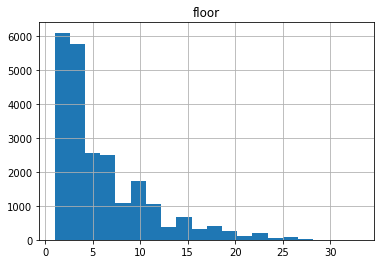

In [56]:
#Гистограмма на весь размах выборки
data['floor'].hist(bins = 20, range=(1, 33));
plt.title(label='floor')
plt.show()

**floor** - основное количество квартир в выборке это 1-5 этаж, гистаграмма имеет классическую форму распределения Пуассона, где слева расположены первые 5 этажей и распределение от 1 до 5 по уменьшающему количеству. Далее идет уменьшение числа квартир до 10 этажа, где наблюдается небольшой всплеск, с последующим плавным уменьшением количества квартир по мере увеличения этажа.

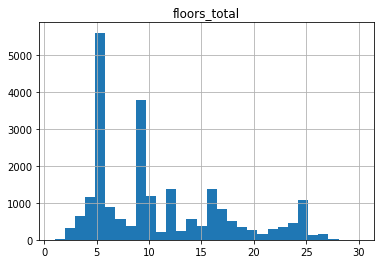

In [57]:
#Гистограмма на основную концентрацию квартир в выборки
data['floors_total'].hist(bins = 30, range=(1, 30));
plt.title(label='floors_total')
plt.show()

**floors_total** - не удивительно, что самое большое количество квартир это 1-5 этаж, т.к. в выборке преобладающее большинство квартир с этажностью 5 и 9 этажей. Так же наблюдается всплески квартир этажностью 12, 16 и 24 этажей, но с более чем в 2 раза уступают 5 и 9 этажкам по количеству.

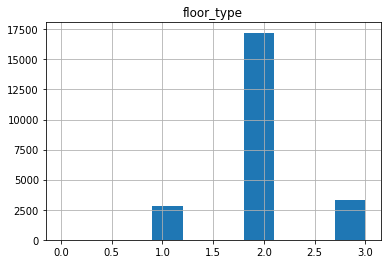

In [58]:
#Гистограмма на весь размах выборки
data['floor_type'].hist(range=(0, 3));
plt.title(label='floor_type')
plt.show()

**floor_type** - в выборке в основном квартиры относящиеся к категории Другие, квартир на первых и последних этажах почти попровну

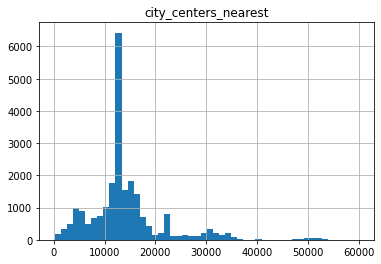

In [59]:
#Гистограмма на весь размах выборки
data['city_centers_nearest'].hist(bins=50, range=(181, 60000));
plt.title(label='city_centers_nearest')
plt.show()

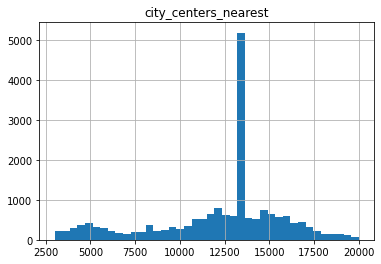

In [60]:
#Гистограмма на основную концентрацию квартир в выборки
data['city_centers_nearest'].hist(bins=40, range=(3000, 20000));
plt.title(label='city_centers_nearest')
plt.show()

**city_centers_nearest** - основное количество квартир в выборке располагается в 10 - 17 км. от центра, с большим количеством (около 5,5 тысяч) квартир в медианном значении. 

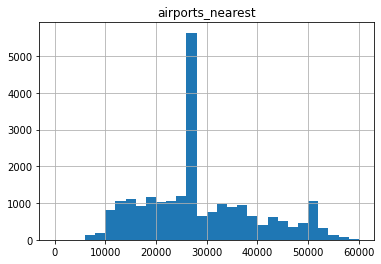

In [61]:
#Гистограмма на весь размах выборки
data['airports_nearest'].hist(bins=30, range=(0, 60000));
plt.title(label='airports_nearest')
plt.show()

**airports_nearest** - основная часть квартир выборки находится от 10 до 50 км от аэропорта, и почти 6 тысяч из них находятся на удаленности 27-28 км.

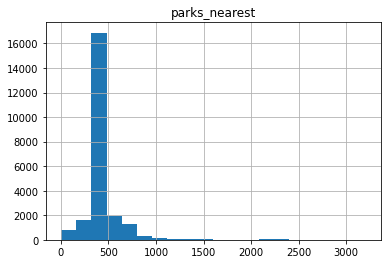

In [62]:
#Гистограмма на весь размах выборки
data['parks_nearest'].hist(bins=20, range=(1, 3200));
plt.title(label='parks_nearest')
plt.show()

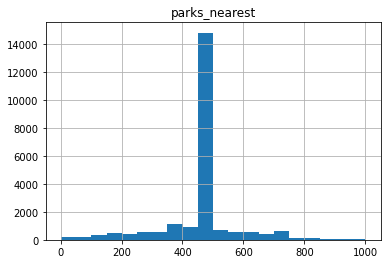

In [63]:
#Гистограмма на основную концентрацию квартир в выборки
data['parks_nearest'].hist(bins=20, range=(1, 1000));
plt.title(label='parks_nearest')
plt.show()

**parks_nearest** - больше половины квартир выборки находятся в 450 - 470 метрах от парка. Квартир удаленностью более 1 км от парка составлет малую часть выбранных квартир.

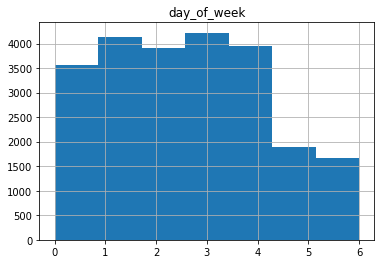

In [64]:
#Гистограмма на весь размах выборки
data['day_of_week'].hist(bins=7);
plt.title(label='day_of_week')
plt.show()

**day_of_week** - по данным выборки публикуются объявления в буднии дни, в выходные почти в двое реже.

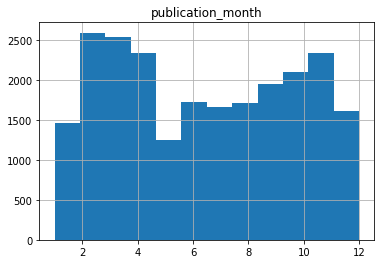

In [65]:
#Гистограмма на весь размах выборки
data['publication_month'].hist(bins=12)
plt.title(label='publication_month')
plt.show()

**publication_month** - менее 1,5 тыс. объявлений о продаже пуликовались только в мае, в остальные месяцы 1,5 тыс и более. Февраль, март, апрель и ноябрь самые активные месяцы публикаций.

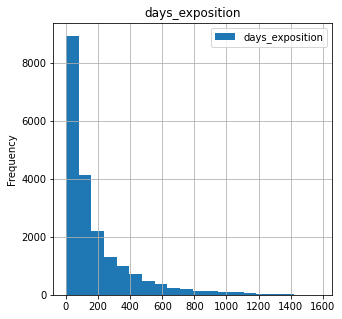

In [66]:
#проверим как быстро продавались квартиры, построим гистаграмму
data.plot(y='days_exposition', kind='hist', bins=20, figsize=(5, 5), grid=True);
plt.title(label='days_exposition')
plt.show()

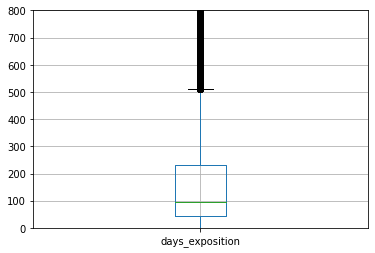

In [67]:
import matplotlib.pyplot as plt
plt.ylim(0, 800)
data.boxplot(column='days_exposition')
plt.show()

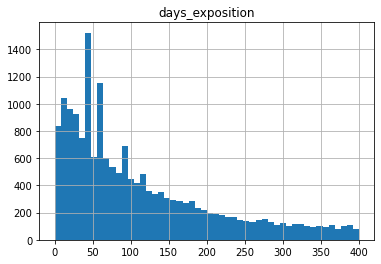

In [68]:
data['days_exposition'].hist(bins=50, range=(0, 400));
plt.title(label='days_exposition')
plt.show()

In [69]:
#Основные статистические показатели days_exposition
data['days_exposition'].describe()

count    20180.000000
mean       180.618385
std        219.742252
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**days_exposition**  
Согласно данным выборки квартиры основное количество квартир продается в период *45 - 231 дней,* (1 и 3 квартиль), и где медианое значение *95 дней*, в данной выборке среднее значение искажается квартирами, которые продавались *более 150 дней* с динамкой уменьшения количества по мере увеличения сроков продажи квартиры.  
Быстрой продажей квартиры можно считать срок продажи квартиры до 50 дней (1 квартиль), сроки которые выше 3 квартиля (более 231 дня) можно считать долгими продажами.

**Факторы влияющие на стоимость объекта**

In [70]:
#создаем сводную таблицу для анализа взаимосвязи параметров с ценой
data_filter = data.filter(items=[
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'last_price', 
    'rooms', 
    'floor_type',
    'day_of_week',
    'publication_month',
    'publication_year'
])
data_filter.head()

,total_area,living_area,kitchen_area,last_price,rooms,floor_type,day_of_week,publication_month,publication_year
0,108.0,51.0,25.0,13000000.0,3,2,3,3,2019
1,40.4,18.6,11.0,3350000.0,1,1,1,12,2018
2,56.0,34.3,8.3,5196000.0,2,2,3,8,2015
3,159.0,45.0,9.5,64900000.0,3,2,4,7,2015
4,100.0,32.0,41.0,10000000.0,2,2,1,6,2018


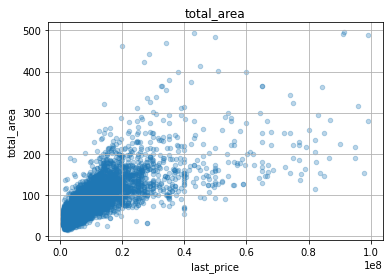

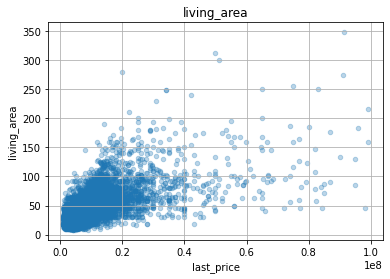

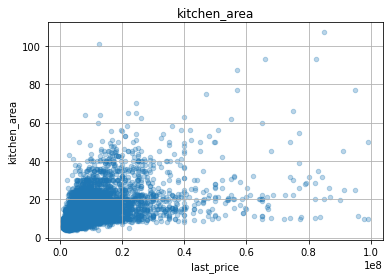

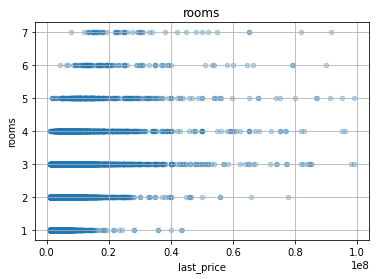

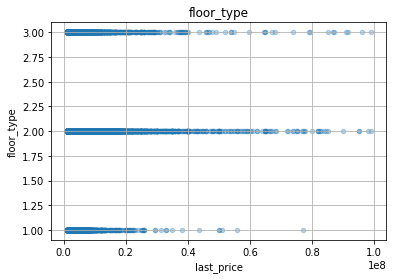

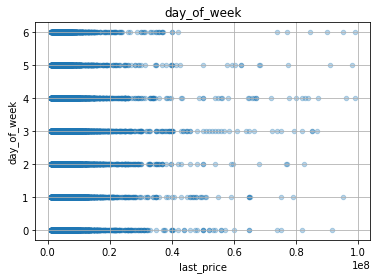

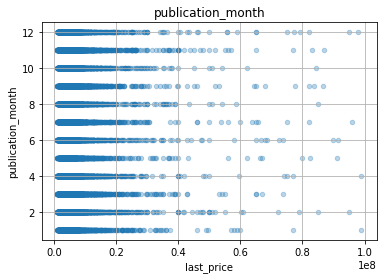

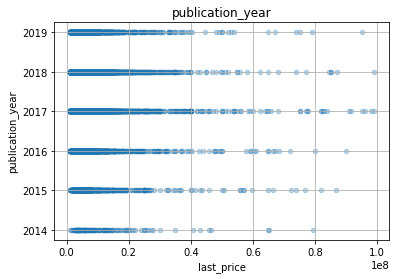

In [71]:
#Гистограммы для определения взаимосвязей между выбраными параметрами и стоимостью
for col in data_filter.columns:
    if col != 'last_price':
        data_filter.plot(x='last_price', y=col, kind='scatter', title=col, grid=True, alpha=0.3);

In [72]:
#Расчет корреляции между стоимостью и выбранными параметрами

print('Таблица кореляции цены с выбранными параметрами:')
(data_filter.corr()
    .filter(items=['last_price'])
    .drop(labels=['last_price', 'floor_type', 'day_of_week', 'publication_month', 'publication_year'], axis=0))

Таблица кореляции цены с выбранными параметрами:


,last_price
total_area,0.764170
living_area,0.652220
kitchen_area,0.557166
rooms,0.464530


Согласно данным выборки на **общую стоимость объекта**, среди выбранных параметров оказывает площадь, в том числе по убыванию линейной связи *total_area - 0,62, living_area - 0,53, kitchen_area - 0,43*. Где *total_area* оказывает наибольшее влияение на стоимость, *living_area и kitchen_area* оказывают более низкое влияение. *rooms* оказывает слабое влияение на стоимость.

In [73]:
#выбор 10 населенных пунктов по коичеству объектов и определение средней стоимости 1 квадратного метра

def avg_data(data, index):
    avg_data_price = data.pivot_table(
        index=index, 
        values = ['last_price', 'total_area'], 
        aggfunc=['mean', 'count']
    ) 
    avg_data_price.columns = ['mean_price', 'mean_area', 'count', 'avg_price_square_metr']
    avg_data_price = avg_data_price.reset_index()
    avg_data_price['avg_price_square_metr'] = avg_data_price['mean_price'] / avg_data_price['mean_area']
    return avg_data_price

print(avg_data(data, 'locality_name')
      .sort_values(by='count', ascending=False)
      .head(10)
      .sort_values(by='avg_price_square_metr', ascending=False)
     )

         locality_name    mean_price  mean_area  count  avg_price_square_metr
31     Санкт-Петербург  7.582437e+06  63.736025  15619          118966.261632
30              Пушкин  6.480637e+06  61.670054    368          105085.631195
81     деревня Кудрово  4.358688e+06  46.395403    472           93946.550994
226  посёлок Парголово  4.488075e+06  51.521407    327           87110.874551
221     посёлок Мурино  3.682867e+06  44.183424    587           83354.033268
251     посёлок Шушары  4.109809e+06  53.886925    439           76267.270155
13             Колпино  3.866289e+06  52.358279    337           73842.926901
6              Гатчина  3.496959e+06  50.854510    306           68763.983888
3           Всеволожск  3.796179e+06  56.106625    397           67660.090562
4               Выборг  3.292931e+06  56.587554    233           58191.795160


**Top 10 населенных пуктов по количеству объектов**  
Самые дорогие по средней стоимости квадртаного метра:  
 - Санкт-Петербург 118966.26 р. 
 - Пушкин          105085.63 р.  
 
Самые дешевые по средней стоимости квадртаного метра:  
 - Всеволожск      67660.09 р.
 - Выборг          58191.8 р.

In [74]:
#Расчет стоимости средней стоимости 1 км. в Санкт-Петербурге
price_city_centers_nearest = avg_data(
    data.query('locality_name == "Санкт-Петербург"'), 
    'city_centers_nearest_km'
)
price_city_centers_nearest = price_city_centers_nearest.sort_values(
    by='city_centers_nearest_km', 
    ascending=True
)

print('Средняя стоимость квадратного метра в зависимости от растояния от центра Санкт-Петерурга')

price_city_centers_nearest[['city_centers_nearest_km', 'avg_price_square_metr']].sort_values(
    by='avg_price_square_metr', ascending=False
)

Средняя стоимость квадратного метра в зависимости от растояния от центра Санкт-Петерурга


,city_centers_nearest_km,avg_price_square_metr
0,0,237483.182381
7,7,172684.403078
1,1,159971.237431
27,27,156603.773585
6,6,154829.693287
2,2,152530.775727
5,5,140026.758347
8,8,128498.638308
4,4,127219.807188
3,3,122189.677087


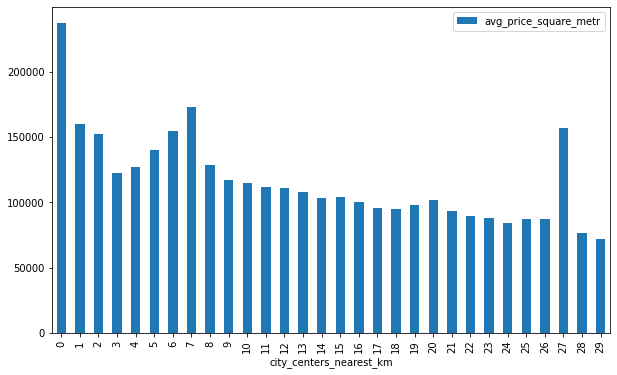

In [75]:
price_city_centers_nearest.plot(
    x='city_centers_nearest_km',
    y='avg_price_square_metr', 
    kind='bar', 
    figsize=(10,6)
);

**Стоимость объектов в зависимости от удаленности от центра Санкт-Петербурга**  
Максимальная средняя стоимость в центре (до 1 км. от центра) - 237483.18 р.     
Минимальная средняя стоимость в 29 км. от центра - 71950.18 р.  
Общая динамика показывает самые высокие цены в центре города и радиусе 1 км, на удаленности 3 км. происходит резкое снижение ценн и постепенное повышение до 7 км., так же неоходимо обратить внимание:  
 - объекты на растоянии 27 км находятся на 4 строчке по уровню среднему уровню цен на 1 квадратный м.
 - объекты на растоянии 2 км находятся на 6 строчке по уровню среднему уровню цен на 1 квадратный м.   
 
Видимо на объекты расположенные дальше от центра более чем 1 км влияют другие факторы, либо другие центры притяжения.

### Общий вывод

Данное исследование направленно на выполнение предобработки данных с целью нахождения интересных особенностей и зависимостей, которые существуют на рынке недвижимости.

Входные данные - выборка из **23699 объекта недвижимости за разные периоды времени** с 22 параметрами (характеристиками), локализованные в г. Санкт-Петербург и Лененградской области

**Основные цели текущего исследования**:  
- Проанализировать и сделать первычиный вывод об информацию в выборке
- Обработать пропуски, некорректные данные и дубликаты в выборке
- Расчитать и добавить в выборку необходимые для анализа новые параметры объектов недвижимости
- Провести исследовательский анализ выборки  

**Проанализировать и сделать первычиный вывод об информацию в выборке:**  
В выборке пользовательские и картографические параметры 23699 обектов недвижимости, определяющие:
  - Характеристики объекта недвижимости и ее типа
  - Характеристики дома в котором располагается объект
  - Фото объекта
  - Дата публикации и количества существования публикации в днях
  - Локация объекта, в том числе относительно объектов, которые могут влиять на стоимость объекта  
Судя по гистаграммам в выборке присутвует занчительно больше квартир с меньшей плошадью, значительно больше объектов расположенные на нижних этажах, в домах 5-15 этажей, которые в большинстве своем располагаются в близи объектов потенциально влияющие на стоимость (центр, парки, аэропорт).

**Провести исследовательский анализ выборки:**  

В представленной выборке в основном представлены объекты:
  - 1, 2, 3 комнатными квартирами, общей площадью 35-80 кв. метров, с жилой площадью 15-50 кв. метров,  и кухней 5,5-12 кв.метров, и высотой потолков 2,5-2,7 метров.
  - Этажность домов, в которых располагаются объекты 5, 9 этажей и объекты в них располагаются в основном не на первых и последних этажах, а с 1 по 4 этажах.
  - Основная часть объектов располагается:
      - на растоянии от центра 10-17 км.
      - на растоянии 20-30 км. от аэропорта
      - большая концетрация объектов в близи парков (в основном до 500 метров)
  - Публикации в основном происходят в буднии дни и больше всего подаются в февраль-апрель и сентябрь-ноябрь
 
В основном объекты продаются в до 231 дня, с пиками продаж объектов 45 и 60 дней.  

Самое большое влияние на цену оказывает площадь квартиры, в т.ч. площадь кухни и жилая площадь. Не очень значительное влияение оказывает количество комнат. Тип этажа так же оказывает клияение на цену - первые этаж в выборке стоит дешевле. День недели и месяц оказываем минимальное влияение на цену, а вот год публикации оказывае влияение в 2014 годы объекты в основном продавались дешевле 2019 года.

Самые дорогие по средней стоимости квадртаного метра:

 - Санкт-Петербург 118966.26 р.
 - Пушкин 105085.63 р.
 
Самые дешевые по средней стоимости квадртаного метра:

 - Всеволожск 67660.09 р.
 - Выборг 58191.8 р.

Зависимость цены объекта от растояния от центра не однозначная:
   - В центре стоимость выше чем объекты которые находятся далее 1 км.
   - До 3 км. идет снижение средней стоимости
   - Рост уровня цен от 4 до 7 км и за тем снижение
   - Резкий рост в районе 27 км.
   
Как и предполагалось стоимость в центре явно выше чем, в других районах, однако нет строгой динамики, понижения цены от центра, есть всплески роста, что говорит о том, что скорее всего имеютс другие факторы кроме нахождения от центра, которые влияют на среднюю цену.
